In [1]:
from src.Sonufy import *
from src.AudioDataGenerator import AudioDataGenerator
import matplotlib.pyplot as plt

In [2]:
adg = AudioDataGenerator(batch_size=32, input_size=(64,1030), output_size=(64,64), directory='data/mels', shorten_factor=2)

Found 131278 files for prediction set


In [68]:
sonufy = Sonufy(latent_dims=128, output_size=(64,64), final_shorten_factor=2)

In [69]:
sonufy.build_model(filters=(16,32,64,256))

In [70]:
sonufy.train(mel_directory='data/mels', epochs=10, train_test_split=.02, batch_size=128, sample_size=100000)

Found 98000 files for training set
Found 2000 files for testing set
Epoch 1/10
765/765 [==============================] - 363s 473ms/step - loss: 0.0106 - val_loss: 0.0072
Epoch 2/10
765/765 [==============================] - 365s 477ms/step - loss: 0.0068 - val_loss: 0.0065
Epoch 3/10
765/765 [==============================] - 368s 480ms/step - loss: 0.0063 - val_loss: 0.0059
Epoch 4/10
765/765 [==============================] - 368s 481ms/step - loss: 0.0058 - val_loss: 0.0056
Epoch 5/10
765/765 [==============================] - 374s 489ms/step - loss: 0.0054 - val_loss: 0.0053
Epoch 6/10
765/765 [==============================] - 389s 508ms/step - loss: 0.0051 - val_loss: 0.0049
Epoch 7/10
765/765 [==============================] - 389s 508ms/step - loss: 0.0049 - val_loss: 0.0047
Epoch 8/10
765/765 [==============================] - 402s 525ms/step - loss: 0.0047 - val_loss: 0.0046
Epoch 9/10
765/765 [==============================] - 423s 552ms/step - loss: 0.0046 - val_loss: 0.0

In [71]:
sonufy.save_encoder('data/test_128dim_256f')
sonufy.build_vectors_from_model(mel_directory='data/mels', all_tracks_file='data/all_tracks_shuffled.feather')
sonufy.save('data/test_128dim_256f')

2022-09-07 23:21:49.144 WARNING absl: Found untraced functions such as _jit_compiled_convolution_op, _jit_compiled_convolution_op, _jit_compiled_convolution_op, _jit_compiled_convolution_op, _jit_compiled_convolution_op while saving (showing 5 of 8). These functions will not be directly callable after loading.
2022-09-07 23:21:49.405 INFO    tensorflow: Assets written to: /var/folders/jy/34vkbxz97tbgm78bc07fmx380000gn/T/tmp9p3ucorf/assets
2022-09-07 23:21:51.158020: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:362] Ignored output_format.
2022-09-07 23:21:51.158047: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:365] Ignored drop_control_dependency.
2022-09-07 23:21:51.158143: I tensorflow/cc/saved_model/reader.cc:43] Reading SavedModel from: /var/folders/jy/34vkbxz97tbgm78bc07fmx380000gn/T/tmp9p3ucorf
2022-09-07 23:21:51.161337: I tensorflow/cc/saved_model/reader.cc:81] Reading meta graph with tags { serve }
2022-09-07 23:21:51.161345: I tens

Encoder saved to "data/test_128dim_256f".
Getting predictions from autoencoder...


INFO: Applying 1 TensorFlow Lite delegate(s) lazily.


[============================================================>] 137615 / 137615

6.53 minutes elapsed
Building tracks dataframe...
Track dataframe built. 0.16 minutes elapsed
Building genre distributions...
[============================================================>] 137615 / 137615

Genre distributions built. 0.7 minutes elapsed
Latent Space Built.


2022-09-07 23:29:20.729 WARNING absl: Found untraced functions such as _jit_compiled_convolution_op, _jit_compiled_convolution_op, _jit_compiled_convolution_op, _jit_compiled_convolution_op, _jit_compiled_convolution_op while saving (showing 5 of 13). These functions will not be directly callable after loading.
2022-09-07 23:29:21.550 INFO    tensorflow: Assets written to: data/test_128dim_256f/assets


Model saved to "data/test_128dim_256f".
saved full model


2022-09-07 23:29:22.456 WARNING absl: Found untraced functions such as _jit_compiled_convolution_op, _jit_compiled_convolution_op, _jit_compiled_convolution_op, _jit_compiled_convolution_op, _jit_compiled_convolution_op while saving (showing 5 of 8). These functions will not be directly callable after loading.
2022-09-07 23:29:22.709 INFO    tensorflow: Assets written to: /var/folders/jy/34vkbxz97tbgm78bc07fmx380000gn/T/tmp1bqk0cug/assets
2022-09-07 23:29:23.856081: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:362] Ignored output_format.
2022-09-07 23:29:23.856099: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:365] Ignored drop_control_dependency.
2022-09-07 23:29:23.856198: I tensorflow/cc/saved_model/reader.cc:43] Reading SavedModel from: /var/folders/jy/34vkbxz97tbgm78bc07fmx380000gn/T/tmp1bqk0cug
2022-09-07 23:29:23.859991: I tensorflow/cc/saved_model/reader.cc:81] Reading meta graph with tags { serve }
2022-09-07 23:29:23.860010: I tens

Encoder saved to "data/test_128dim_256f".
saved encoder
saved database files
Saved full model, encoder, and database files in data/test_128dim_256f.


In [35]:
# sonufy.load('data/test_128dim_newmels/')

In [72]:
test_img = adg.take(6)[0]
test_img2 = adg.take(0)[0]

Two separate images taken from different tracks:

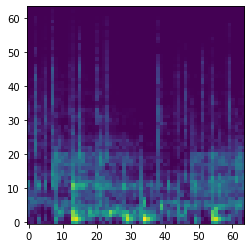

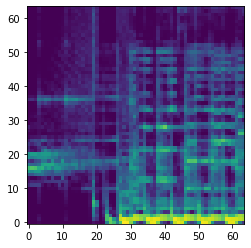

In [73]:
plt.imshow(test_img[0], origin='lower')
plt.show()
plt.imshow(test_img2[0], origin='lower')
plt.show()

Autoencoder predictions for those images.

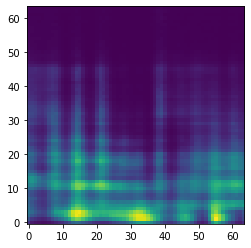

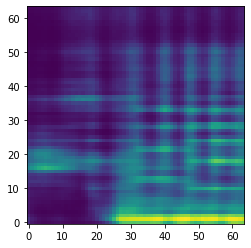

In [74]:
plt.imshow(sonufy.autoencoder(test_img)[0], origin='lower')
plt.show()
plt.imshow(sonufy.autoencoder(test_img2)[0], origin='lower')
plt.show()

Distribution comparison between two images.

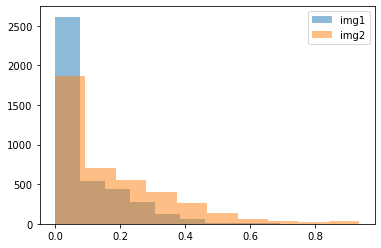

In [75]:
plt.hist(np.array(test_img[0]).reshape(-1), alpha=0.5, label='img1')
plt.hist(np.array(test_img2[0]).reshape(-1), alpha=0.5, label='img2')
plt.legend()
plt.show()

Distribution comparision between one image and the prediction.

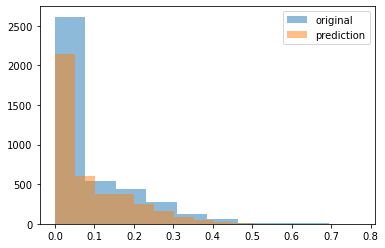

In [76]:
plt.hist(np.array(test_img[0]).reshape(-1), alpha=0.5, label='original')
plt.hist(np.array(sonufy.autoencoder(test_img)[0]).reshape(-1), alpha=0.5, label='prediction')
plt.legend()
plt.show()

comparison between encoded original and encoded prediction

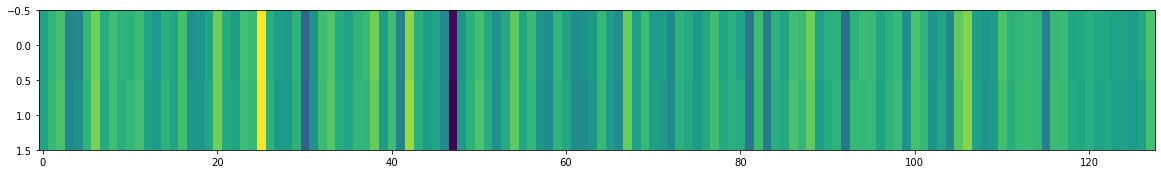

In [77]:
concat_img = np.array([sonufy.autoencoder.encoder(sonufy.autoencoder(test_img))[0], sonufy.autoencoder.encoder(test_img)[0]])
plt.figure(figsize=(20,5))
plt.imshow(concat_img, aspect=8)

compare encoded between two images

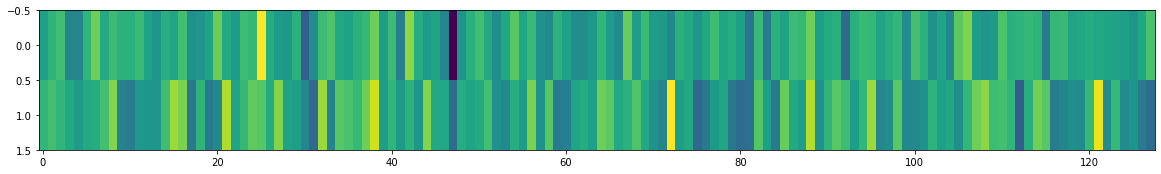

In [78]:
concat_img_compare = np.array([sonufy.autoencoder.encoder(sonufy.autoencoder(test_img))[0], sonufy.autoencoder.encoder(sonufy.autoencoder(test_img2))[0]])
plt.figure(figsize=(20,5))
plt.imshow(concat_img_compare, aspect=8)

compare encoded between two images and the mean of the first image batch.

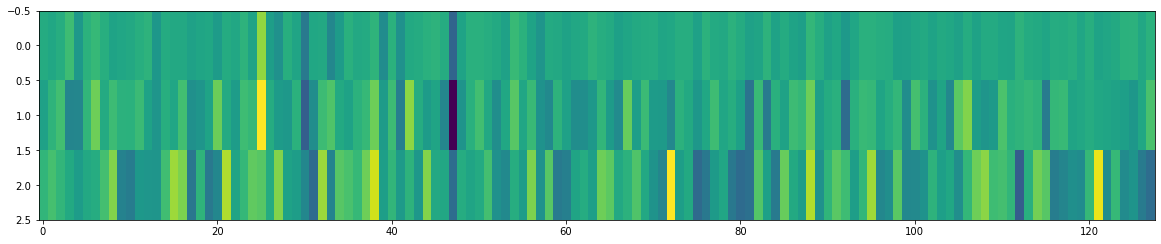

In [79]:
concat_img_compare = np.array([np.array(sonufy.autoencoder.encoder(sonufy.autoencoder(test_img))).mean(axis=0), sonufy.autoencoder.encoder(sonufy.autoencoder(test_img))[0], sonufy.autoencoder.encoder(sonufy.autoencoder(test_img2))[0]])
plt.figure(figsize=(20,5))
plt.imshow(concat_img_compare, aspect=8)

Look at the scale of each feature in the encoded space. Needs to be scaled which is what is happening later on.

In [80]:
pd.Series(np.array(sonufy.autoencoder.encoder(test_img)[0]).reshape(-1))

0     -1.616902
1      3.454361
2      5.993553
3     -8.783822
4     -6.750288
         ...   
123   -2.424132
124   -2.480509
125   -4.369854
126   -2.485764
127    5.420264
Length: 128, dtype: float32

In [81]:
concat_img_compare[0].shape

(128,)

heat map cosine similarity between encoded images for entire batch vs batch

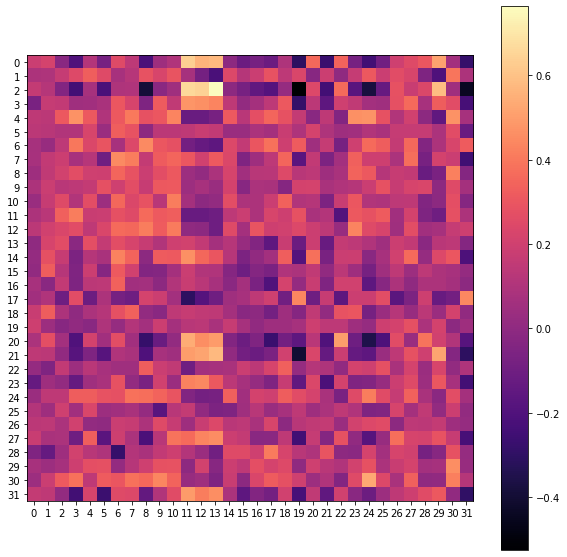

In [82]:
from sklearn.metrics.pairwise import cosine_similarity

plt.figure(figsize=(10,10))
plt.imshow(cosine_similarity(sonufy.autoencoder.encoder(test_img), sonufy.autoencoder.encoder(test_img2)), cmap='magma')
plt.xticks(ticks=range(32))
plt.yticks(ticks=range(32))
plt.colorbar()
plt.show()

cosine similarity between mean and the entire batch of the second image.

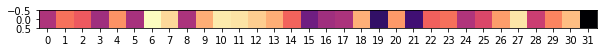

In [83]:
plt.figure(figsize=(10,10))
plt.imshow(cosine_similarity(np.array(sonufy.autoencoder.encoder(test_img)).mean(axis=0).reshape(1,-1), sonufy.autoencoder.encoder(test_img2)), cmap='magma')
plt.xticks(ticks=range(32))
plt.show()

cosine similarity between encoded space of the mean of the two images.

In [84]:
cosine_similarity(np.array(sonufy.autoencoder.encoder(test_img)).mean(axis=0).reshape(1,-1), np.array(sonufy.autoencoder.encoder(test_img2)).mean(axis=0).reshape(1,-1))


array([[0.7597375]], dtype=float32)

In [87]:
a, b, c, d = sonufy.search_for_recommendations(query='uncontrollable urge', get_time_and_freq=True)

/Users/michaelroth/miniforge3/envs/golden_env/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [88]:
a['name']

'Uncontrollable Urge'

In [89]:
b

,track_name,track_uri,artist_name,similarity,track_popularity,time_similarity,frequency_similarity
0,Shoot Your Shot,spotify:track:70d20IUPSFrxkg6DmeYEA5,Divine,0.725755,23,0.681182,0.758513
1,Turn the Radio On,spotify:track:0YSHsWugAqvfIAAhVXEYla,The Suburbs,0.699571,18,0.659911,0.737921
2,Short Change,spotify:track:67IDs9DldgnvbSrNg6wNa3,The Spencer Davis Group,0.684947,34,0.589661,0.754254
3,Pile! No Pile! Pile!,spotify:track:7wu00QzPN5gnGLBdbxtXwD,Brave Little Abacus,0.683060,37,0.573747,0.776775
4,Do You Miss Me?,spotify:track:0iKEAMGAY5HySUJoqYg9Lq,Neverstore,0.677825,19,0.571237,0.749787
5,The Auld Triangle,spotify:track:3Z80Oi7leKcs5zQhKDL0GD,Damien Dempsey,0.675680,22,0.527760,0.793061
6,Tonight - New Version 1989,spotify:track:04K5cqXcYaDaI4d7kRnuAh,The Rubettes,0.665314,37,0.608525,0.713595
7,Dub Organizer,spotify:track:7kPhhekWV5aGqHswCmnTBH,Augustus Pablo,0.663478,43,0.592280,0.735270
8,California,spotify:track:22yJ0ejEpEz9s0WRPl2Y8D,Quasi,0.659928,19,0.694219,0.647648
9,Cursing Concrete,spotify:track:7Dr8fMfYoVviKMrVVMhRfw,Rumbleseat,0.658255,40,0.579705,0.724636


In [92]:
sonufy.save('data/test_128dim_256f/')

2022-09-07 23:33:38.654 WARNING absl: Found untraced functions such as _jit_compiled_convolution_op, _jit_compiled_convolution_op, _jit_compiled_convolution_op, _jit_compiled_convolution_op, _jit_compiled_convolution_op while saving (showing 5 of 13). These functions will not be directly callable after loading.
2022-09-07 23:33:39.506 INFO    tensorflow: Assets written to: data/test_128dim_256f/assets


Model saved to "data/test_128dim_256f/".
saved full model


2022-09-07 23:33:40.478 WARNING absl: Found untraced functions such as _jit_compiled_convolution_op, _jit_compiled_convolution_op, _jit_compiled_convolution_op, _jit_compiled_convolution_op, _jit_compiled_convolution_op while saving (showing 5 of 8). These functions will not be directly callable after loading.
2022-09-07 23:33:40.822 INFO    tensorflow: Assets written to: /var/folders/jy/34vkbxz97tbgm78bc07fmx380000gn/T/tmpybt4souc/assets
2022-09-07 23:33:41.862939: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:362] Ignored output_format.
2022-09-07 23:33:41.862959: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:365] Ignored drop_control_dependency.
2022-09-07 23:33:41.863044: I tensorflow/cc/saved_model/reader.cc:43] Reading SavedModel from: /var/folders/jy/34vkbxz97tbgm78bc07fmx380000gn/T/tmpybt4souc
2022-09-07 23:33:41.879787: I tensorflow/cc/saved_model/reader.cc:81] Reading meta graph with tags { serve }
2022-09-07 23:33:41.879804: I tens

Encoder saved to "data/test_128dim_256f/".
saved encoder
saved database files
Saved full model, encoder, and database files in data/test_128dim_256f/.


In [49]:
similarity_img = np.concatenate([np.array(d), np.array(c[sonufy.latent_cols])])

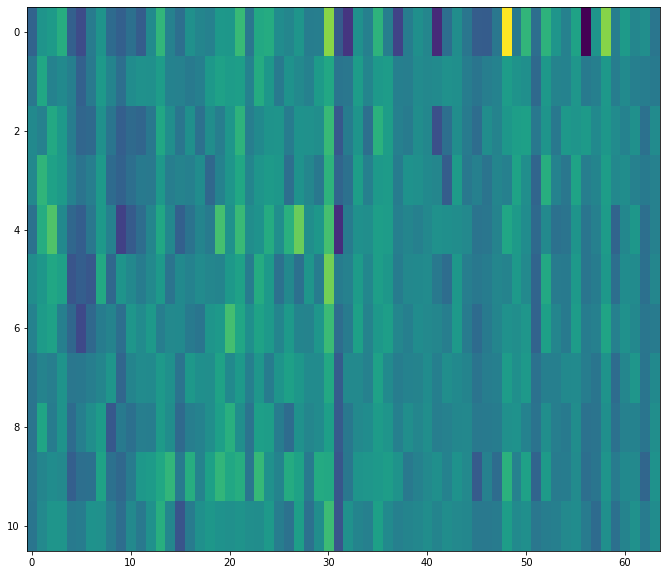

In [50]:
plt.figure(figsize=(20,10))
plt.imshow(similarity_img, aspect=5)

In [51]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [52]:
mean_squared_error(test_img[0].reshape(64,64), np.array(sonufy.autoencoder(test_img)[0]).reshape(64,64))

0.0036256783996364405